# p.23(데이터 정제 연습)

In [3]:
import pandas as pd # 데이터 구성 패키지:Siries, DataFrame
import numpy as np # 행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등) 패키지
from sklearn.preprocessing import scale, minmax_scale, robust_scale #Scaling클래스
#\utils\plot.py
plt.rc('font', family=r"/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf")

 #한글폰트적용
%matplotlib inline 
# matplotlib를 이용한 Background 그래프 실행 및 결과 확인

# p.24(데이터 불러오기)

In [319]:
df_raw = pd.read_csv("/home/pirl/Downloads/FITNESS_결측.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


# p.25(결측치 확인하기)

In [320]:
df_raw.isnull().head()
df_raw.isna().head() #isnull값과 동일
#값이 결측이면 True, 값이 있으면 False로 나타냄

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


# p.26(결측치 확인 - 변수별 결측 확인)

In [321]:
#결측치(True)현황 요약: sum함수
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

# p.27(범주형(문자) 변수 결측치 처리: GENDER 변수의 결측치에 "여성"으로 대체)

In [322]:
#문자형 결측치 처리: pandas, DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

SyntaxError: invalid syntax (<ipython-input-322-6ee893e9b21c>, line 3)

# p.28(연속형(숫자) 변수 결측치 처리: GENDER별 WEIGHT 평균 계산)

In [323]:
#숫자형 결측치 처리: groupby(범주형 변수), agg("집계함수")
df_raw.groupby("GENDER")["WEIGHT"].agg("mean")

GENDER
남성    82.433077
여성    72.311333
Name: WEIGHT, dtype: float64

# p.29 (연속형(숫자) 변수 결측치 처리: WEIGHT 변수의 결측을 GENDER = "남성"의 WEIGHT 평균값으로 대체

In [324]:
#숫자형 결측치 처리: transform("집계함수")
# 코드가 길어 행 바꿈 필요시 \(won 표시) 끝에 추가
df_raw["WEIGHT"] = \
    df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


# p.30 (이상치 확인 및 처리: 상자 수염도표를 이용한 이상치 확인)

findfont: Font family ['/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf'] not found. Falling back to DejaVu Sans.


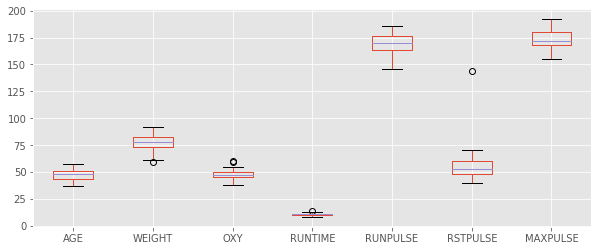

In [325]:
df_raw.boxplot(figsize = (10,4)) 
#boxplot: 상자수염도, figsize:그래프 크기(x축, y축)

# p.31(이상치 확인 및 처리: 조건에 해당하는 자료 직접 확인)

In [326]:
df_raw["RSTPULSE"] >=100 #RSTPULSE 변수에서 이상치(100보다 큰 값) 확인: True/False 표시
df_raw.loc[27:29] 

df_raw[(df_raw["RSTPULSE"]>=100)] #조건 해당 자료 직접 확인
#복수 조건: &(and), |(or)
#df_raw[(dr_raw["RSTPULSE"]>=100) & (df_raw["GENDER"])=="남성"]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


# p.32(이상치 확인 및 처리: 이상치 제거)

In [327]:
df_fitness = df_raw[df_raw["RSTPULSE"]<100] #RSTPULSE 변수에서 이상치 제외(100이하)
df_fitness

#자료 index reset: DataFrame.reset.index
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


# p.33(Scale변환: Scale변환 대상 변수 = 숫자형 변수(문자형 변수는 적용 안됨)

In [328]:
#select_dtypes 조건으로 변수 유형 선택: select_dtypes="object" - 문자형 변수
#숫자형 변수 선택: select_dtypes = "object"제외(exclude)
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()

#문자형 변수 선택: select_dtypes = "object"선택
df_fitness_char = df_fitness.select_dtypes(include = "object")
df_fitness_char.head()

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,NaN,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


# p.34(Scale변환(평균, 표준편차)

In [329]:
#scale변환: 평균, 표준편차 기준
df_scale_std = scale(df_fitness_num)
#scale 적용/변환하면 numpy의 ndarray형태로 저장 -> Dataframe으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head()

#scale변환 결과 확인: 요약통계량: pandas.DataFrame.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


# p.35(Scale변환: 최소-최대)

In [330]:
#scale변화: 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_fitness_num)
#scale 적용/ 변환하면 numpy의 ndarray형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head()


#scale 변환 결과 확인: 요약통계량: pandas.DataFrame.describe()
df_scale_desc = df_scale_minmax.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.480,0.552,0.453,0.399,0.592,0.459,0.509
std,0.290,0.248,0.229,0.229,0.261,0.251,0.252
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.300,0.431,0.343,0.262,0.412,0.267,0.351
50%,0.525,0.547,0.425,0.381,0.600,0.417,0.459
75%,0.700,0.717,0.568,0.510,0.750,0.625,0.676
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


# p.36(Scale변환: 로버스트)

In [331]:
df_scale_robust = robust_scale(df_fitness_num)
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


# p.37(Scale반환 결과 비교: 예시로 RSTPULSE 변수 비교)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96a88d33d0>,
      dtype=object)

findfont: Font family ['/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf'] not found. Falling back to DejaVu Sans.


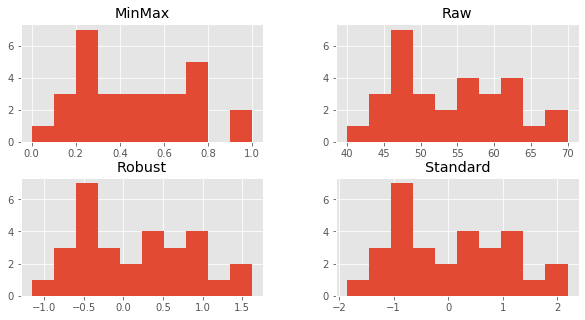

In [332]:
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"]
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"]
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"]
df_rstpulse.head().round(3)

df_rstpulse[["Raw","Standard","MinMax","Robust"]].hist(figsize=(10,5))

In [333]:
df_fitness = pd.read_csv("/home/pirl/Downloads/FITNESS.csv", engine = 'python', encoding = 'EUC-KR')
df_fitness.head()

df_currency = pd.read_csv("/home/pirl/Downloads/환율.csv", engine = 'python', encoding = 'EUC-KR')
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,20160101,181.48,0.1541
1,JPY,20160101,976.99,0.8294
2,USD,20160101,1178.00,1.0000
3,CNY,20160102,181.48,0.1541
4,JPY,20160102,976.99,0.8294


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeW

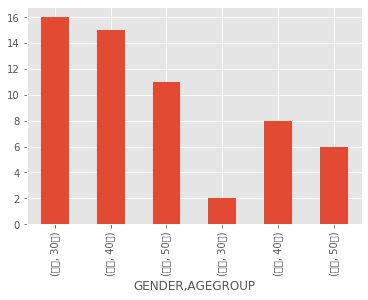

In [334]:
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

df_count = df_fitness["AGEGROUP"].value_counts()
df_count.sort_index(inplace = True);
df_count.plot.bar()

df_groupby_total = df_fitness.groupby(["GENDER","AGEGROUP"],as_index = False).size()
df_groupby_total.plot.bar()

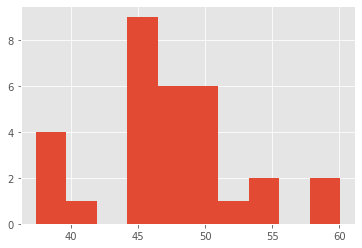

In [335]:
df_fitness["OXY"].hist()

TypeError: 'numpy.ndarray' object is not callable

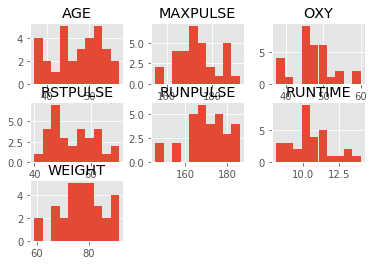

In [336]:
df_fitness.hist()(figsize= (10,7))

In [ ]:
df_fitness.hist(column ="OXY", by="GENDER",range=(35,65))
grid = sns.FacetGrid(df_fitness, col="GENDER")
grid.map(plt.hist, "OXY")

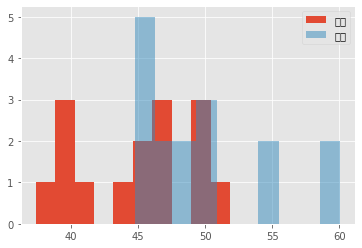

In [337]:
plt.hist(df_fitness[df_fitness["GENDER"]=="남성"]["OXY"], label = "남성", alpha = 1)
plt.hist(df_fitness[df_fitness["GENDER"]=="여성"]["OXY"], label = "여성", alpha = 0.5)
plt.legend()

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

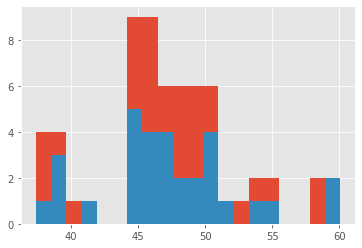

In [338]:
plt.hist(x = "OXY", data = df_fitness)
plt.hist(x = "OXY", data=df_fitness, bins=20)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/pirl/anacon

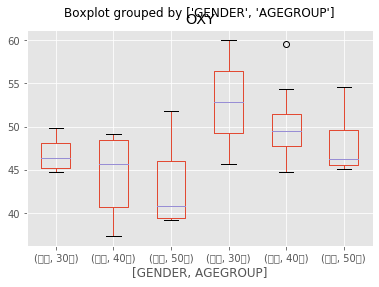

In [339]:
plt.rc('font', family="Malgun Gothic")
df_fitness.boxplot(column = "OXY", by = ["GENDER", "AGEGROUP"])

In [4]:
titanic = pd.read_csv("/home/pirl/Downloads/titanic.csv", engine = 'python', encoding = 'EUC-KR')

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

findfont: Font family ['/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/malgunbd.ttf'] not found. Falling back to DejaVu Sans.


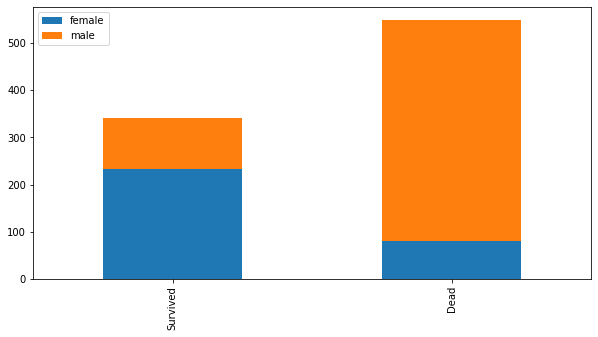

In [5]:
def bar_chart(feature): #살았는지 죽었는지 두개의 막대차트로 표시하는 함수를 정의해보자.
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('Sex')

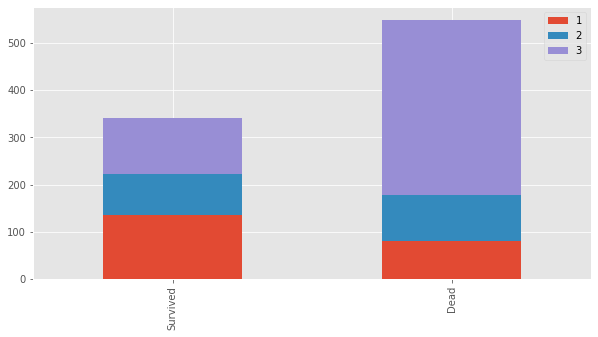

In [342]:
bar_chart('Pclass')

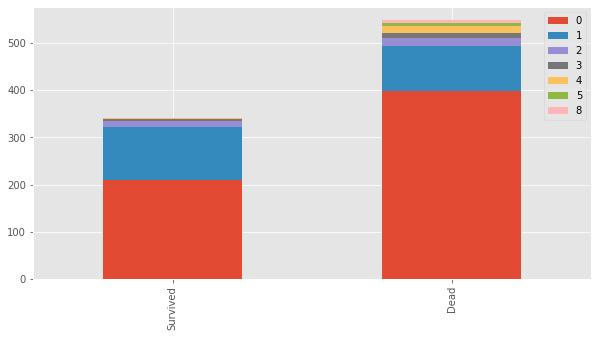

In [343]:
bar_chart('SibSp')

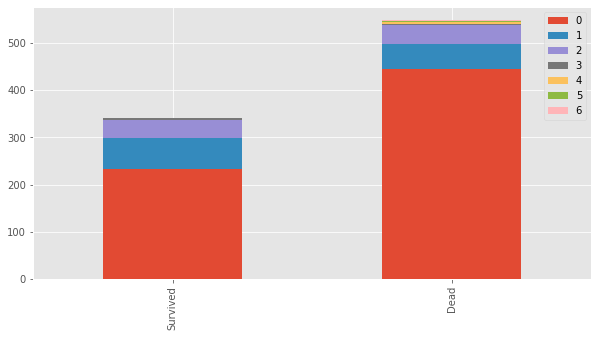

In [344]:
bar_chart('Parch')

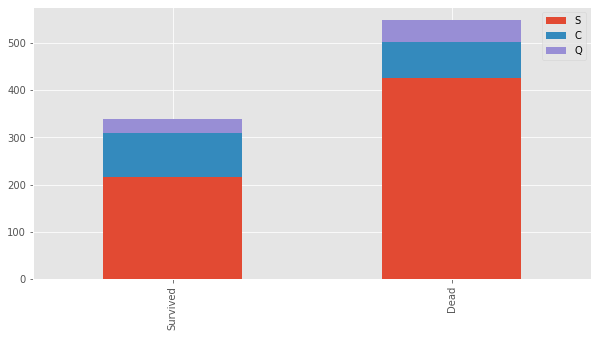

In [345]:
bar_chart('Embarked')

In [346]:
slice_name = [titanic]
for dataset in slice_name:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)
titanic['Title'].value_counts()
# 남자> 미혼여성 > 기혼여성 > 의사....

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Sir           1
Don           1
Jonkheer      1
Ms            1
Capt          1
Mme           1
Lady          1
Countess      1
Name: Title, dtype: int64

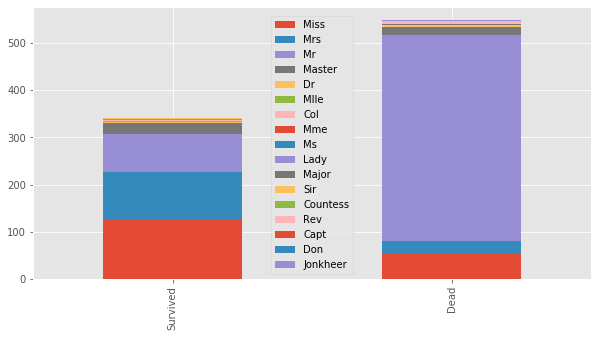

In [347]:
def bar_chart(feature):
    survived = titanic[titanic['Survived']==1][feature].value_counts()
    dead = titanic[titanic['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('Title')
# Mr.(남성)은 상대적으로 많이 죽었음을 알 수 있다. 반면 Miss와 Mrs.(여성)은 상대적으로 많이 생존했음을 알 수 있다.

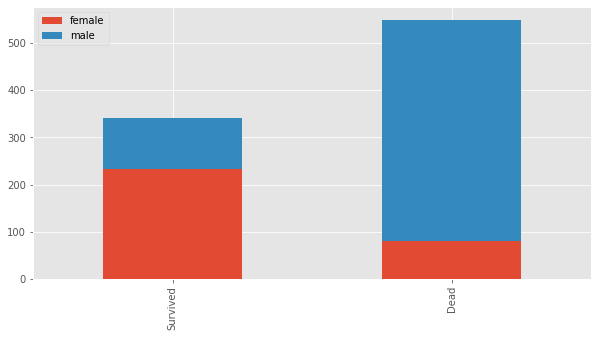

In [348]:
bar_chart('Sex')

In [349]:
# 데이터 셋에서 불필요한 feature 삭제
titanic.drop('Cabin', axis=1, inplace=True)


In [350]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [351]:
# Missing Age를 각 Title에 대한 연령의 중간값 으로 채운다(Mr, Mrs, Miss, Others)
titanic['Age'].fillna(titanic.groupby('Title')['Age'].transform('median'), inplace=True)
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

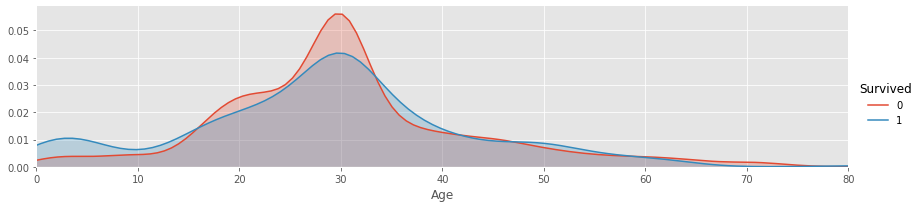

In [352]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

(0, 20)

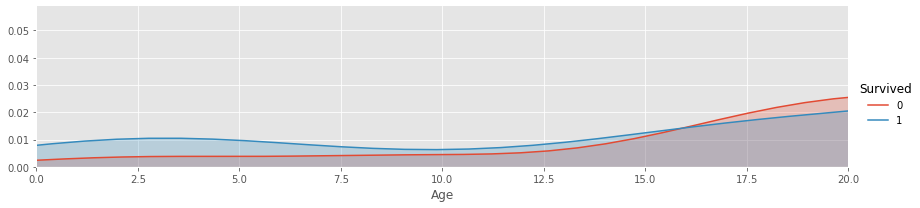

In [353]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 40)

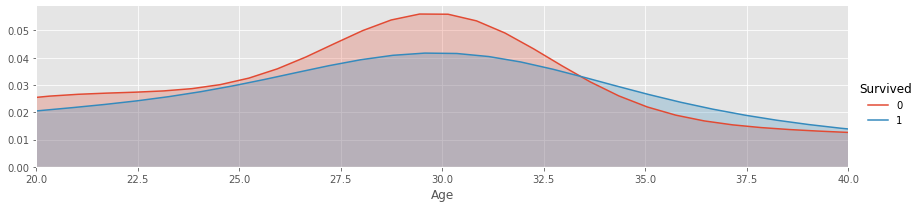

In [354]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(20,40)

(40, 60)

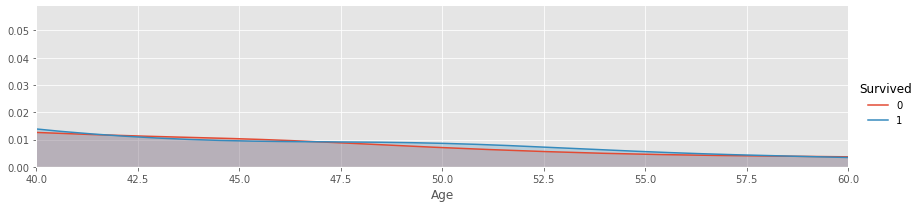

In [355]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

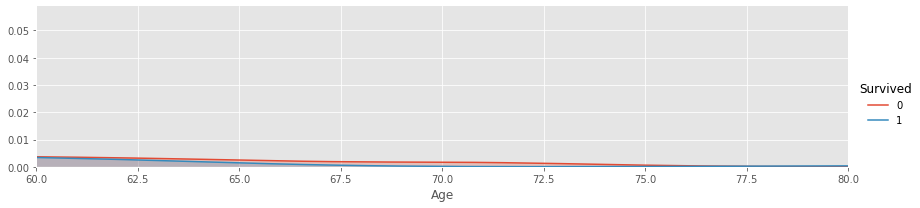

In [356]:
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, titanic['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

In [357]:
titanic["Embarked"].fillna("S", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [358]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

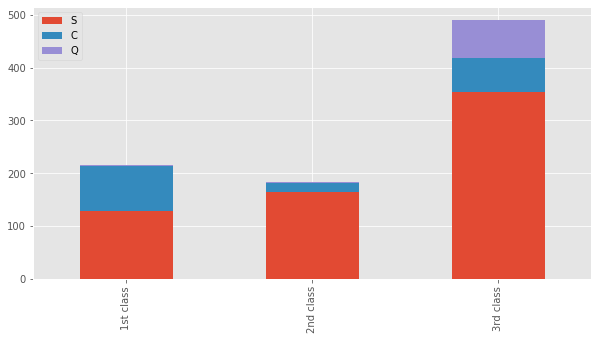

In [359]:
Pclass1 = titanic[titanic['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic[titanic['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic[titanic['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

#Q 도시에서 탄 사람들은 1, 2등급이 거의 없음.


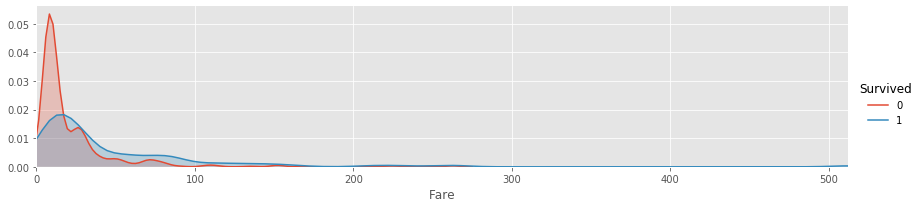

In [360]:
titanic["Fare"].fillna(titanic.groupby('Pclass')['Fare'].transform('median'), inplace=True)
facet = sns.FacetGrid(titanic, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, titanic['Fare'].max()))
facet.add_legend()

plt.show()

In [362]:
titanic1 = titanic[(titanic['Fare']>=300)] #이상치 확인
titanic1.reset_index(drop = True, inplace = True)
titanic1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss
1,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr
2,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr


In [365]:
titanic.reset_index(drop = True, inplace = True)
titanic[(titanic['Fare']>=300)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C,Miss
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,Mr
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C,Mr
